In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.patches import Polygon

import sys
sys.path.append('../../student_download')
from episode_functions import *

In [2]:
filename = '../../student_download/backup-data/gd1_data.hdf'
winner_df = pd.read_hdf(filename, 'winner_df')

centerline_df = pd.read_hdf(filename, 'centerline_df')
candidate_df = pd.read_hdf(filename, 'candidate_df')
loop_df = pd.read_hdf(filename, 'loop_df')

indx = len(loop_df)//2
left_color = loop_df['color_loop'][:indx]
right_color = loop_df['color_loop'][indx:][::-1]
g = loop_df['mag_loop'][:indx]

pm1_min = -8.9
pm1_max = -6.9
pm2_min = -2.2
pm2_max =  1.0

pm1_rect, pm2_rect = make_rectangle(
    pm1_min, pm1_max, pm2_min, pm2_max)

# Episode 8: Visualization

Making a Figure that Tells a Story
* so far: quick and dirty
* publication ready figures
* communicate science clearly and compellingly

### Exercise

Think about the following questions:
1. What is the primary scientific result of this work?
2. What story is this figure telling?
3. In the design of this figure, can you identify 1 or 2 choices the authors made that you think are effective? Think about big-picture elements, like the number of panels and how they are arranged, as well as details like the choice of typeface.
4. Can you identify 1 or 2 elements that could be improved, or that you might have done differently?

### Solution
No figure is perfect, and everyone can be a critic. Here are some topics that could come up in this discussion:
1. The primary result is that adding physical selection criteria makes it possible to separate likely candidates from the background more effectively than in previous work, which makes it possible to see the structure of GD-1 in “unprecedented detail,” allowing the authors to detect that the stream is larger than previously observed.
2. The figure documents the selection process as a sequence of reproducible steps, containing enough information for a skeptical reader to understand the authors’ choices. Reading right-to-left, top-to-bottom, we see selection based on proper motion, the results of the first selection, selection based on stellar surface properties (color and magnitude), and the results of the second selection. So this figure documents the methodology, presents the primary result, and serves as reference for other parts of the paper (and presumably, talk, if this figure is reused for colloquia).
3. The figure is mostly black and white, with minimal use of color, and mostly uses large fonts. It will likely work well in print and only needs a few adjustments to be accessible to low vision readers and none to accommodate those with poor color vision. The annotations in the bottom left panel guide the reader to the results discussed in the text.
4. The panels that can have the same units, dimensions, and their axes are aligned, do.
5. The on-sky positions likely do not need so much white space.
6. Axes ticks for the on-sky position figures are not necessary since this is not in an intuitive coordinate system or a finder chart. Instead, we would suggest size bar annotations for each dimension to give the reader the needed scale.
7. The text annotations could be darker for more contrast and appear only over white background to increase accessibility
8. The legend in the bottom right panel has a font too small for low-vision readers. At the very least, those details (and the isochrone line) could be called out in the caption.

## Plotting GD-1 with Annotations

### Exercise
Plot the selected stars in winner_df using the plot_cmd_selection function and then choose any or all of these features and add them to the figure:
* To draw vertical lines, see plt.vlines and plt.axvline.
* To add text, see plt.text.
* To add an annotation with text and an arrow, see plt.annotate.
Here is some additional information about text and arrows.

Text(-25, -5.5, 'Gap')

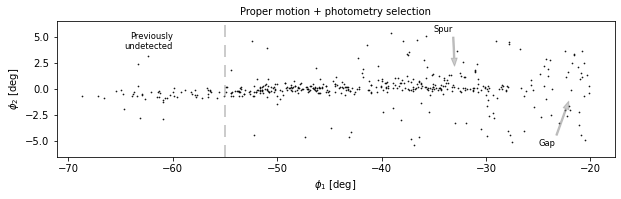

In [3]:
fig = plt.figure(figsize=(10,2.5))
plot_cmd_selection(winner_df)
plt.axvline(-55, ls='--', color='gray', 
            alpha=0.4, dashes=(6,4), lw=2)
plt.text(-60, 5.5, 'Previously\nundetected', 
         fontsize='small', ha='right', va='top');

arrowprops=dict(color='gray', shrink=0.05, width=1.5, 
                headwidth=6, headlength=8, alpha=0.4)

plt.annotate('Spur', xy=(-33, 2), xytext=(-35, 5.5),
             arrowprops=arrowprops,
             fontsize='small')

plt.annotate('Gap', xy=(-22, -1), xytext=(-25, -5.5),
             arrowprops=arrowprops,
             fontsize='small')

## Customization
* single figure: tick_params
* notebook: rcParams
* often used: style file

For more customization, need the figure and axes objects

note: subplot and axes can be used interchangably (subplots are axes with additional properties)

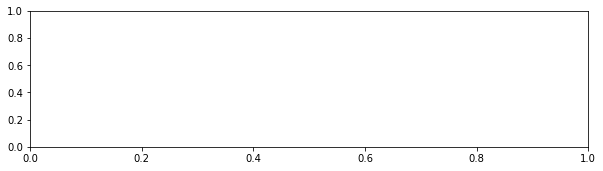

In [4]:
fig = plt.figure(figsize=(10,2.5))
ax = fig.add_subplot(1,1,1)

put ticks on the inside

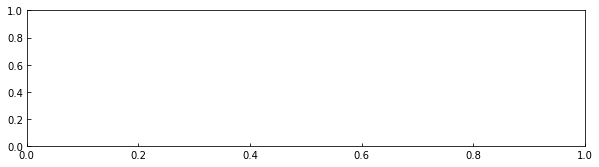

In [5]:
fig = plt.figure(figsize=(10,2.5))
ax = fig.add_subplot(1,1,1)
ax.tick_params(direction='in')

### Exercise

Read the documentation of tick_params and use it to put ticks on the top and right sides of the axes.

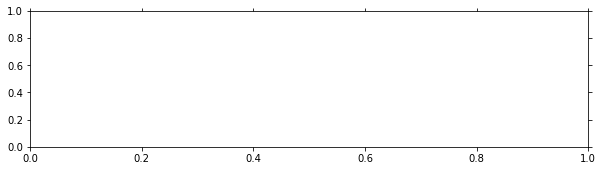

In [6]:
#Solution
fig = plt.figure(figsize=(10,2.5))
ax = fig.add_subplot(1,1,1)
ax.tick_params(top=True, right=True)

## rcParams

dictionary

In [7]:
plt.rcParams['font.size']

10.0

In [8]:
plt.rcParams['font.size'] = 14

### Exercise
Plot the previous figure again, and see what font sizes have changed. Look up any other element of rcParams (remember its a dictionary that you can print), change its value, and check the effect on the figure.

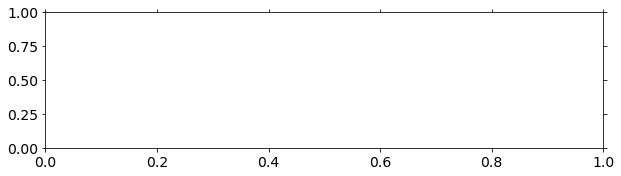

In [9]:
fig = plt.figure(figsize=(10,2.5))
ax = fig.add_subplot(1,1,1)
ax.tick_params(top=True, right=True)

In [10]:
print(plt.rcParams)

_internal.classic_mode: False
agg.path.chunksize: 0
animation.avconv_args: []
animation.avconv_path: avconv
animation.bitrate: -1
animation.codec: h264
animation.convert_args: []
animation.convert_path: convert
animation.embed_limit: 20.0
animation.ffmpeg_args: []
animation.ffmpeg_path: ffmpeg
animation.frame_format: png
animation.html: none
animation.html_args: []
animation.writer: ffmpeg
axes.autolimit_mode: data
axes.axisbelow: line
axes.edgecolor: black
axes.facecolor: white
axes.formatter.limits: [-5, 6]
axes.formatter.min_exponent: 0
axes.formatter.offset_threshold: 4
axes.formatter.use_locale: False
axes.formatter.use_mathtext: False
axes.formatter.useoffset: True
axes.grid: False
axes.grid.axis: both
axes.grid.which: major
axes.labelcolor: black
axes.labelpad: 4.0
axes.labelsize: medium
axes.labelweight: normal
axes.linewidth: 0.8
axes.prop_cycle: cycler('color', ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])
axes

In [11]:
plt.rcParams['font.weight']='bold'

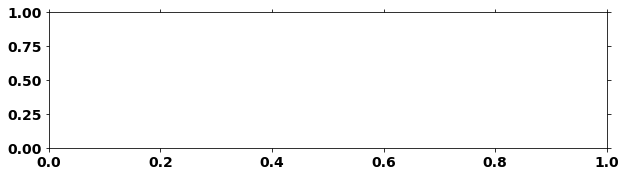

In [12]:
fig = plt.figure(figsize=(10,2.5))
ax = fig.add_subplot(1,1,1)
ax.tick_params(top=True, right=True)

rcParams populated from matplotlibrc file. Here's how to find that

In [13]:
import matplotlib as mpl
mpl.matplotlib_fname()

'/Users/bostroem/.matplotlib/matplotlibrc'

https://matplotlib.org/stable/tutorials/introductory/customizing.html#matplotlibrc-sample

## Style Sheets

Style sheets: when you want to do the same changes over and over again
    
https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html

In [14]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'az-paper-onecol',
 'az-paper-twocol',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [15]:
plt.style.use('fivethirtyeight')

In [16]:
plt.style.use('default')

### Exercise
Choose one of the styles on the list and select it by calling use. Then go back and plot one of the figures above and see what changes in the figure’s appearance.

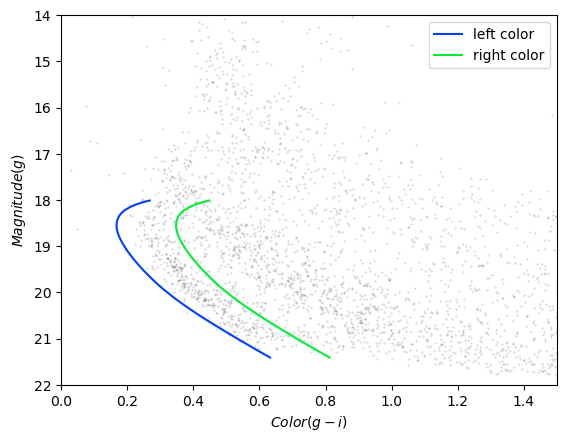

In [17]:
plt.style.use('seaborn-bright')
plot_cmd(candidate_df)

plt.plot(left_color, g, label='left color')
plt.plot(right_color, g, label='right color')

plt.legend();

make your own!

In [18]:
plt.style.use('../../student_download/az-paper-twocol.mplstyle')

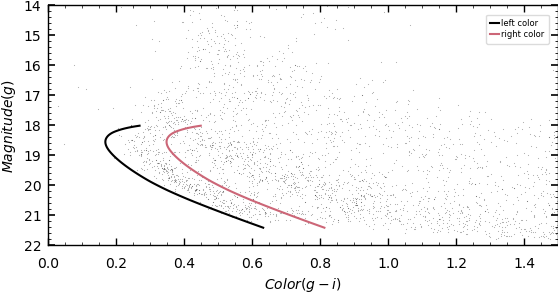

In [19]:
plot_cmd(candidate_df)

plt.plot(left_color, g, label='left color')
plt.plot(right_color, g, label='right color')

plt.legend();

In [20]:
mpl.get_configdir()

'/Users/bostroem/.matplotlib'

## Multiple Panels

In [21]:
plt.style.use('default')

* `add_subplot` creates equal size plots, but we want unequal -> use `subplot2grid`
* First argument: total number of columns and number of rows  
* second argument: location of particular plot

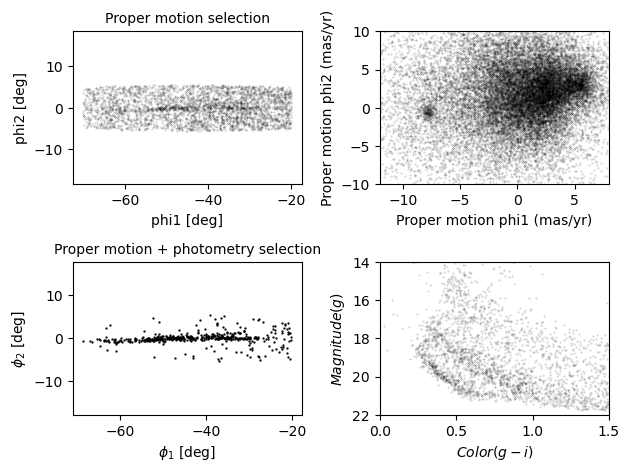

In [22]:
fig = plt.figure()
shape = (2, 2)
ax1 = plt.subplot2grid(shape, (0, 0))
plot_pm_selection(candidate_df)

ax2 = plt.subplot2grid(shape, (0, 1))
plot_proper_motion(centerline_df)

ax3 = plt.subplot2grid(shape, (1, 0))
plot_cmd_selection(winner_df)

ax4 = plt.subplot2grid(shape, (1, 1))
plot_cmd(candidate_df)

plt.tight_layout()

### Exercise
What happens if you leave out tight_layout?

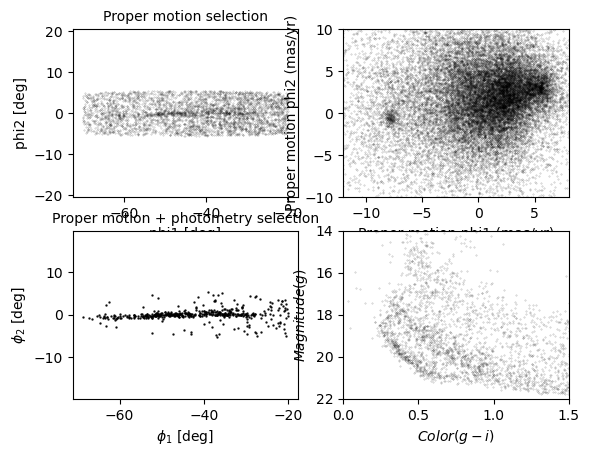

In [23]:
fig = plt.figure()
shape = (2, 2)
ax1 = plt.subplot2grid(shape, (0, 0))
plot_pm_selection(candidate_df)

ax2 = plt.subplot2grid(shape, (0, 1))
plot_proper_motion(centerline_df)

ax3 = plt.subplot2grid(shape, (1, 0))
plot_cmd_selection(winner_df)

ax4 = plt.subplot2grid(shape, (1, 1))
plot_cmd(candidate_df)

## Adjusting Proportions

* change figure size
* add more columns and use `colspan`

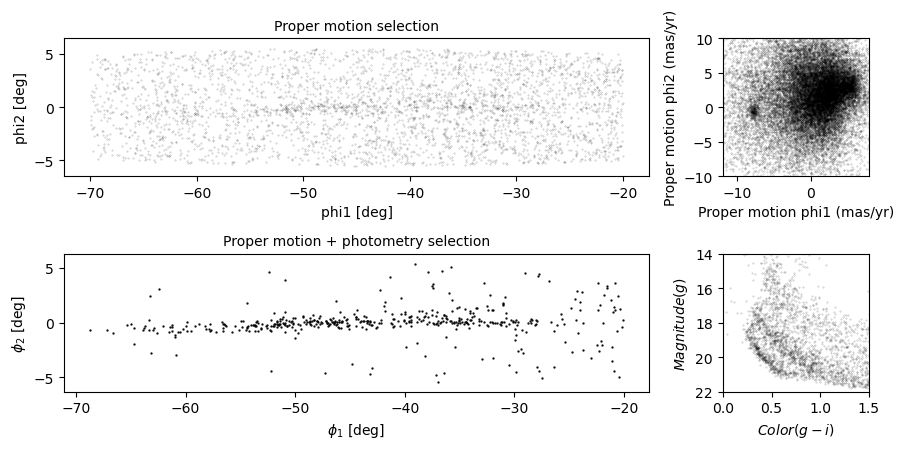

In [24]:
plt.figure(figsize=(9, 4.5))

shape = (2, 4)
ax1 = plt.subplot2grid(shape, (0, 0), colspan=3)
plot_pm_selection(candidate_df)

ax2 = plt.subplot2grid(shape, (0, 3))
plot_proper_motion(centerline_df)

ax3 = plt.subplot2grid(shape, (1, 0), colspan=3)
plot_cmd_selection(winner_df)

ax4 = plt.subplot2grid(shape, (1, 3))
plot_cmd(candidate_df)

plt.tight_layout()

### Exercise
In this example, the ratio of the widths of the panels is 3:1. How would you adjust it if you wanted the ratio to be 3:2?

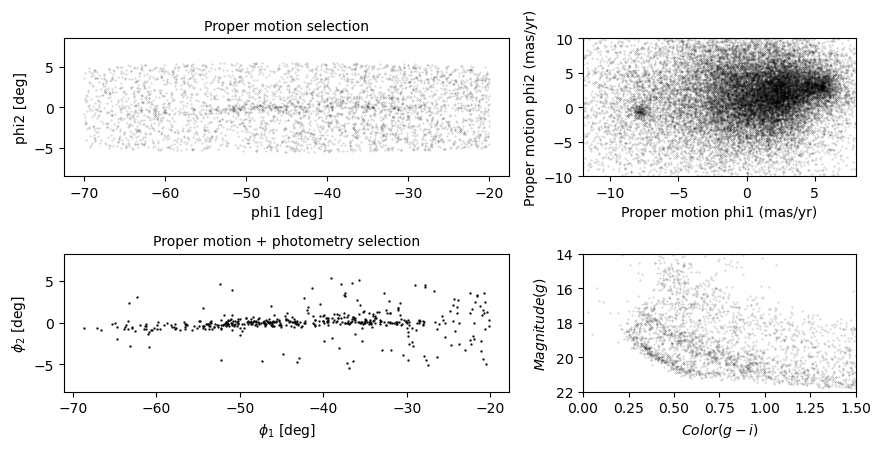

In [25]:
plt.figure(figsize=(9, 4.5))

shape = (2, 5)                                   # CHANGED
ax1 = plt.subplot2grid(shape, (0, 0), colspan=3)
plot_pm_selection(candidate_df)

ax2 = plt.subplot2grid(shape, (0, 3), colspan=2)       # CHANGED
plot_proper_motion(centerline_df)

ax3 = plt.subplot2grid(shape, (1, 0), colspan=3)
plot_cmd_selection(winner_df)

ax4 = plt.subplot2grid(shape, (1, 3), colspan=2)       # CHANGED
plot_cmd(candidate_df)

plt.tight_layout()

## Adding the shaded regions

we have x, y list and we want x,y pairs so we can use `Polygon` (from episode 4)

In [26]:
vertices = np.transpose([pm1_rect, pm2_rect])
vertices

array([[-8.9, -2.2],
       [-8.9,  1. ],
       [-6.9,  1. ],
       [-6.9, -2.2],
       [-8.9, -2.2]])

When we make the Polygon object we can specify its plotting properties

In [27]:
poly = Polygon(vertices, closed=True, 
                   facecolor='orange', alpha=0.4)

* add_patch has to be called on an axes or subplot object

(-10.0, 10.0)

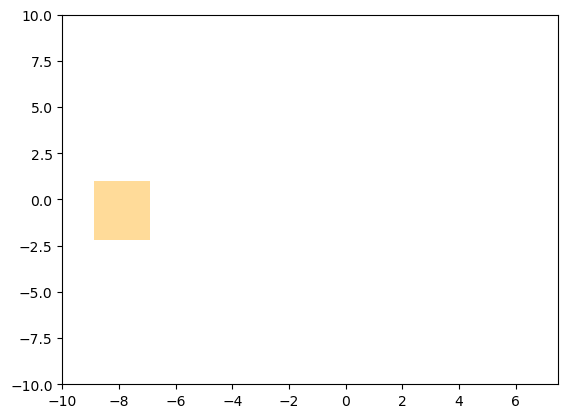

In [28]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
poly = Polygon(vertices, closed=True, 
                   facecolor='orange', alpha=0.4)
ax.add_patch(poly)
ax.set_xlim(-10, 7.5)
ax.set_ylim(-10, 10)

### Add the stars in the background

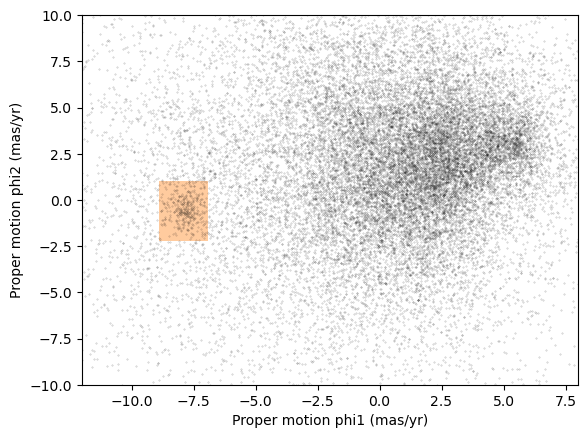

In [29]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plot_proper_motion(centerline_df)
poly = Polygon(vertices, closed=True, 
               facecolor='C1', alpha=0.4)
ax.add_patch(poly)

### Exercise

Add a few lines to be run after the plot_cmd function to show the polygon we selected as a shaded area.
Hint: pass loop_df as an argument to Polygon as we did in episode 6 and then plot it using add_patch.

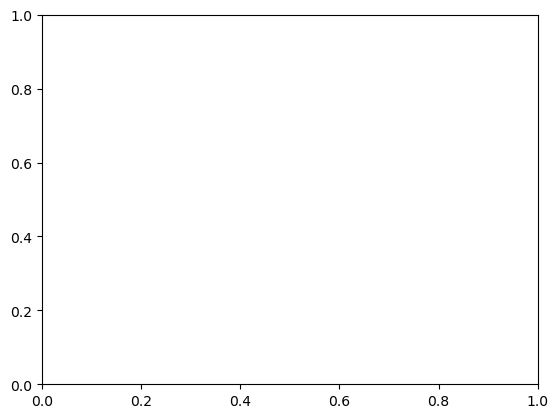

In [30]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
poly_cmd = Polygon(loop_df, closed=True, 
              facecolor='C1', alpha=0.4)
ax.add_patch(poly_cmd)

### Exercise

Add the Polygon patches you just created to the right panels of the four panel figure.

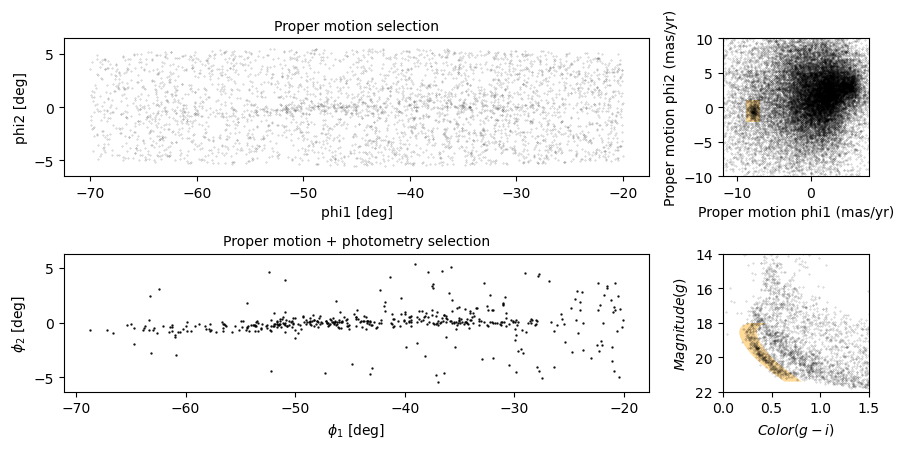

In [31]:
fig = plt.figure(figsize=(9, 4.5))

shape = (2, 4)
ax1 = plt.subplot2grid(shape, (0, 0), colspan=3)
plot_pm_selection(candidate_df)

ax2 = plt.subplot2grid(shape, (0, 3))
plot_proper_motion(centerline_df)
poly = Polygon(vertices, closed=True,
               facecolor='orange', alpha=0.4)
ax2.add_patch(poly)

ax3 = plt.subplot2grid(shape, (1, 0), colspan=3)
plot_cmd_selection(winner_df)

ax4 = plt.subplot2grid(shape, (1, 3))
plot_cmd(candidate_df)
poly_cmd = Polygon(loop_df, closed=True, 
               facecolor='orange', alpha=0.4)
ax4.add_patch(poly_cmd)

plt.tight_layout()